This code checks the practical implementation of displacement operation ${D(\gamma)}$ using a strong coherent light and beam splitter. When a strong coherent state is represented as ${|\alpha\rangle}$ and the transmittanse of the beam splitter is ${T}$, ${\gamma}$ is to be ${\gamma = \sqrt{1-T}\alpha}$.

https://doi.org/10.1016/0375-9601(96)00339-8

https://doi.org/10.1088/1367-2630/11/4/043012

In [1]:
import strawberryfields as sf
from strawberryfields.ops import *

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
import math

mpl.rcParams['figure.facecolor'] = 'white'

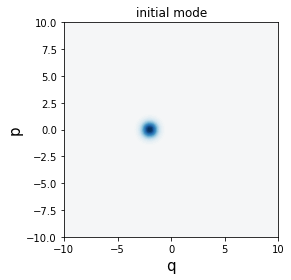

In [8]:
prog = sf.Program(1)

alpha = -2+1j
r = np.abs(alpha)
phi = np.angle(alpha)

with prog.context as q:
    Coherent(r, phi) | q[0]

eng = sf.Engine('gaussian')#, backend_options={"cutoff_dim": 15})
state = eng.run(prog, shots=1, modes=None, compile_options={}).state

quad_axis = np.linspace(-10, 10, 1000)
Win = state.wigner(mode=0, xvec=quad_axis * sf.hbar, pvec=quad_axis * sf.hbar)

color_range = np.max(Win.real)
nrm = mpl.colors.Normalize(-color_range, color_range)
plt.axes().set_aspect("equal")
plt.contourf(quad_axis, quad_axis, Win, 60, cmap=cm.RdBu, norm=nrm)
plt.xlabel("q", fontsize=15)
plt.ylabel("p", fontsize=15)
plt.title('initial mode')
plt.tight_layout()
plt.show()

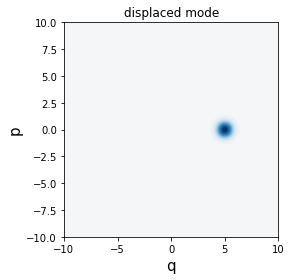

In [9]:
prog = sf.Program(2)

with prog.context as q:
    Coherent(r, phi) | q[0]
    Coherent(70) | q[1]

    BSgate(math.acos(np.sqrt(0.99)), np.pi) | (q[0], q[1])

eng = sf.Engine('gaussian')#, backend_options={"cutoff_dim": 15})
state = eng.run(prog, shots=1, modes=None, compile_options={}).state

quad_axis = np.linspace(-10, 10, 1000)
Wout = state.wigner(mode=0, xvec=quad_axis * sf.hbar, pvec=quad_axis * sf.hbar)

color_range = np.max(Win.real)
nrm = mpl.colors.Normalize(-color_range, color_range)
plt.axes().set_aspect("equal")
plt.contourf(quad_axis, quad_axis, Wout, 60, cmap=cm.RdBu, norm=nrm)
plt.xlabel("q", fontsize=15)
plt.ylabel("p", fontsize=15)
plt.title('displaced mode')
plt.tight_layout()
plt.show()